In [13]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/9a/25/5b30cb3efc9566f0ebeaeca1976150316353c17031ad7868ef46de5ab8dc/scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 796.9 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


C:\Users\keevi\AppData\Local\Temp\ipykernel_25540\1732039531.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
# File URL
file_url = "https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/name.basics_New.csv"

# Read the CSV file into a DataFrame
name_basics = pd.read_csv(file_url)

# Display the DataFrame
print(name_basics)

          nconst          primaryName birthYear deathYear  \
0      nm0000001         Fred Astaire      1899      1987   
1      nm0000002        Lauren Bacall      1924      2014   
2      nm0000003      Brigitte Bardot      1934        \N   
3      nm0000004         John Belushi      1949      1982   
4      nm0000005       Ingmar Bergman      1918      2007   
...          ...                  ...       ...       ...   
49995  nm0052383        Mitch Banning        \N        \N   
49996  nm0052385        Harry Bannink      1929      1999   
49997  nm0052386  Maria Elena Bannino        \N        \N   
49998  nm0052387        Edmard Bannis        \N        \N   
49999  nm0052388    Stefan Bannischka        \N        \N   

                         primaryProfession  \
0           soundtrack,actor,miscellaneous   
1                       actress,soundtrack   
2      actress,soundtrack,music_department   
3                  actor,soundtrack,writer   
4                    writer,director,

In [15]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nconst             50000 non-null  object
 1   primaryName        50000 non-null  object
 2   birthYear          50000 non-null  object
 3   deathYear          50000 non-null  object
 4   primaryProfession  48998 non-null  object
 5   knownForTitles     50000 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


In [16]:
name_basics.describe()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,50000,50000,50000,50000,48998,50000
unique,50000,47708,200,162,3490,47096
top,nm0000001,John Anderson,\N,\N,actor,\N
freq,1,15,32715,41853,10406,422


In [17]:
name_basics.dtypes

nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtype: object

In [13]:
import pandas as pd

# File URL
file_url = "https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.akas_New.csv"

# Read the CSV file into a DataFrame
title_akas = pd.read_csv(file_url)

# Display the DataFrame
print(title_akas)


         titleId  ordering                      title region        types  \
0      tt0000001         1                 Карменсіта     UA  imdbDisplay   
1      tt0000001         2                 Carmencita     DE          NaN   
2      tt0000001         3  Carmencita - spanyol tánc     HU  imdbDisplay   
3      tt0000001         4                 Καρμενσίτα     GR  imdbDisplay   
4      tt0000001         5                 Карменсита     RU  imdbDisplay   
...          ...       ...                        ...    ...          ...   
49995  tt0014060         6                     フランス人形     JP  imdbDisplay   
49996  tt0014060         7          Den franske Dukke     NO  imdbDisplay   
49997  tt0014060         8          Den franske Dukke     DK  imdbDisplay   
49998  tt0014060         9            The French Doll     US  imdbDisplay   
49999  tt0014061         1    Friaren från landsvägen     SE  imdbDisplay   

       isOriginalTitle  
0                    0  
1                    0  


In [18]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titleId          50000 non-null  object
 1   ordering         50000 non-null  int64 
 2   title            50000 non-null  object
 3   region           35317 non-null  object
 4   types            44700 non-null  object
 5   isOriginalTitle  50000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


In [19]:
title_akas.describe()

,ordering,isOriginalTitle
count,50000.000000,50000.000000
mean,3.850840,0.275740
std,4.865962,0.446891
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,4.000000,1.000000
max,62.000000,1.000000


In [20]:
title_akas.dtypes

titleId            object
ordering            int64
title              object
region             object
types              object
isOriginalTitle     int64
dtype: object

In [29]:
import pandas as pd

# File URL
file_url = "https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.basics_New.csv"

# Read the CSV file into a DataFrame
title_basics = pd.read_csv(file_url)

# Display the DataFrame
print(title_basics)

          tconst titleType               primaryTitle  \
0      tt0000001     short                 Carmencita   
1      tt0000002     short     Le clown et ses chiens   
2      tt0000003     short             Pauvre Pierrot   
3      tt0000004     short                Un bon bock   
4      tt0000005     short           Blacksmith Scene   
...          ...       ...                        ...   
49995  tt0050917     movie              Ryadom s nami   
49996  tt0050918     movie             Räkna med bråk   
49997  tt0050919     movie            Rio, Zona Norte   
49998  tt0050920     movie  Rübezahl - Herr der Berge   
49999  tt0050921     movie    Sabu and the Magic Ring   

                   originalTitle  isAdult startYear endYear runtimeMinutes  \
0                     Carmencita        0      1894      \N              1   
1         Le clown et ses chiens        0      1892      \N              5   
2                 Pauvre Pierrot        0      1892      \N              4   
3  

In [30]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          50000 non-null  object
 1   titleType       50000 non-null  object
 2   primaryTitle    50000 non-null  object
 3   originalTitle   50000 non-null  object
 4   isAdult         50000 non-null  int64 
 5   startYear       50000 non-null  object
 6   endYear         50000 non-null  object
 7   runtimeMinutes  50000 non-null  object
 8   genres          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [31]:
title_basics.describe()

,isAdult
count,50000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [33]:
title_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [34]:
import pandas as pd

# File URL
file_url = "https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.crew_New.csv"

# Read the CSV file into a DataFrame
title_crew = pd.read_csv(file_url)

# Display the DataFrame
print(title_crew)

          tconst  directors                        writers
0      tt0000001  nm0005690                            NaN
1      tt0000002  nm0721526                            NaN
2      tt0000003  nm0721526                            NaN
3      tt0000004  nm0721526                            NaN
4      tt0000005  nm0005690                            NaN
...          ...        ...                            ...
49995  tt0050917  nm0075142            nm0441228,nm0582637
49996  tt0050918  nm0403855                      nm0511688
49997  tt0050919  nm0673051                      nm0673051
49998  tt0050920  nm0462163  nm0527337,nm0462163,nm0819709
49999  tt0050921  nm0086251  nm0293159,nm0615080,nm0736276

[50000 rows x 3 columns]


In [35]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tconst     50000 non-null  object
 1   directors  48085 non-null  object
 2   writers    43160 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [36]:
title_crew.describe()

,tconst,directors,writers
count,50000,48085,43160
unique,50000,8268,32214
top,tt0000001,nm0000428,nm0279404
freq,1,498,304


In [37]:
title_crew.dtypes

tconst       object
directors    object
writers      object
dtype: object

In [38]:
import pandas as pd

# File URL
file_url = "https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.episode_New.csv"

# Read the CSV file into a DataFrame
title_episode = pd.read_csv(file_url)

# Display the DataFrame
print(title_episode)

          tconst parentTconst  seasonNumber  episodeNumber
0      tt0041951    tt0041038           1.0            9.0
1      tt0042816    tt0989125           1.0           17.0
2      tt0042889    tt0989125           NaN            NaN
3      tt0043426    tt0040051           3.0           42.0
4      tt0043631    tt0989125           2.0           16.0
...          ...          ...           ...            ...
49995  tt0539289    tt0431515           1.0           28.0
49996  tt0539290    tt0431515           1.0           29.0
49997  tt0539291    tt0431515           1.0            3.0
49998  tt0539292    tt0431515           1.0           30.0
49999  tt0539293    tt0431515           1.0           31.0

[50000 rows x 4 columns]


In [39]:
title_episode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         50000 non-null  object 
 1   parentTconst   50000 non-null  object 
 2   seasonNumber   41678 non-null  float64
 3   episodeNumber  41678 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


In [40]:
title_episode.describe()

,seasonNumber,episodeNumber
count,41678.000000,41678.000000
mean,4.999016,153.364773
std,44.800193,953.115564
min,1.000000,0.000000
25%,1.000000,4.000000
50%,2.000000,9.000000
75%,5.000000,19.000000
max,2003.000000,12652.000000


In [41]:
title_episode.dtypes

tconst            object
parentTconst      object
seasonNumber     float64
episodeNumber    float64
dtype: object

In [42]:
import pandas as pd

# File URL
file_url = "https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.ratings_New.csv"

# Read the CSV file into a DataFrame
title_ratings = pd.read_csv(file_url)

# Display the DataFrame
print(title_ratings)

          tconst  averageRating  numVotes
0      tt0000001            5.7      2020
1      tt0000002            5.7       270
2      tt0000003            6.5      1944
3      tt0000004            5.4       178
4      tt0000005            6.2      2722
...          ...            ...       ...
49995  tt0072596            5.8       299
49996  tt0072597            4.9       289
49997  tt0072598            6.1        75
49998  tt0072599            5.1        13
49999  tt0072600            5.0       343

[50000 rows x 3 columns]


In [43]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         50000 non-null  object 
 1   averageRating  50000 non-null  float64
 2   numVotes       50000 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [44]:
title_ratings.describe()

,averageRating,numVotes
count,50000.000000,5.000000e+04
mean,6.177168,1.609848e+03
std,1.020767,1.772931e+04
min,1.000000,5.000000e+00
25%,5.600000,3.400000e+01
50%,6.200000,1.130000e+02
75%,6.900000,4.440000e+02
max,10.000000,1.986321e+06


In [45]:
title_ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [66]:
import pandas as pd
from sklearn.pipeline import Pipeline

# Define the raw URLs for the CSV files on GitHub
name_basics_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/name.basics_New.csv'
title_akas_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.akas_New.csv'
title_basics_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.basics_New.csv'
title_crew_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.crew_New.csv'
title_ratings_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.ratings_New.csv'
title_episode_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.episode_New.csv'

# Define a function to read a CSV file into a DataFrame
def read_csv(url):
    return pd.read_csv(url)

# Create a pipeline
pipeline = Pipeline([
    ('name_basics', read_csv(name_basics_url)),
    ('title_akas', read_csv(title_akas_url)),
    ('title_basics', read_csv(title_basics_url)),
    ('title_crew', read_csv(title_crew_url)),
    ('title_ratings', read_csv(title_ratings_url)),
    ('title_episode', read_csv(title_episode_url))
])

# Execute the pipeline
dfs = {name: step for name, step in zip(pipeline.named_steps.keys(), pipeline.named_steps.values())}

# Display the DataFrames
for name, df in dfs.items():
    print(f"\n{name.upper()} DataFrame:")
    print(df.head())



NAME_BASICS DataFrame:
      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                     primaryProfession  \
0       soundtrack,actor,miscellaneous   
1                   actress,soundtrack   
2  actress,soundtrack,music_department   
3              actor,soundtrack,writer   
4                writer,director,actor   

                            knownForTitles  
0  tt0031983,tt0050419,tt0072308,tt0053137  
1  tt0037382,tt0117057,tt0038355,tt0075213  
2  tt0049189,tt0054452,tt0056404,tt0057345  
3  tt0078723,tt0080455,tt0072562,tt0077975  
4  tt0050976,tt0050986,tt0069467,tt0083922  

TITLE_AKAS DataFrame:
     titleId  ordering                      title region        types  \
0  tt0000001         1                

Data Overview showing information about each DataFrame

In [70]:
# Display basic information about each DataFrame
for name, df in dfs.items():
    print(f"\n{name.upper()} DataFrame Overview:")
    print(df.info())


NAME_BASICS DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nconst             50000 non-null  object
 1   primaryName        50000 non-null  object
 2   birthYear          50000 non-null  object
 3   deathYear          50000 non-null  object
 4   primaryProfession  48998 non-null  object
 5   knownForTitles     50000 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB
None

TITLE_AKAS DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titleId          50000 non-null  object
 1   ordering         50000 non-null  int64 
 2   title            50000 non-null  object
 3   region           35317 non-null  object
 4   types            44700 

Summary Statistics showing numerical columns

In [71]:
# Display summary statistics for numerical columns in each DataFrame
for name, df in dfs.items():
    if df.select_dtypes(include='number').shape[1] > 0:
        print(f"\n{name.upper()} Summary Statistics:")
        print(df.describe())


TITLE_AKAS Summary Statistics:
           ordering  isOriginalTitle
count  50000.000000     50000.000000
mean       3.850840         0.275740
std        4.865962         0.446891
min        1.000000         0.000000
25%        1.000000         0.000000
50%        2.000000         0.000000
75%        4.000000         1.000000
max       62.000000         1.000000

TITLE_BASICS Summary Statistics:
       isAdult
count  50000.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0

TITLE_RATINGS Summary Statistics:
       averageRating      numVotes
count   50000.000000  5.000000e+04
mean        6.177168  1.609848e+03
std         1.020767  1.772931e+04
min         1.000000  5.000000e+00
25%         5.600000  3.400000e+01
50%         6.200000  1.130000e+02
75%         6.900000  4.440000e+02
max        10.000000  1.986321e+06

TITLE_EPISODE Summary Statistics:
       seasonNumber  episodeNumber
count  41678.000000   41678.000000
mean       

Unique Values in each numberical column

In [72]:
# Display unique values and counts for categorical columns in each DataFrame
for name, df in dfs.items():
    if df.select_dtypes(exclude='number').shape[1] > 0:
        print(f"\n{name.upper()} Unique Values:")
        for column in df.select_dtypes(exclude='number').columns:
            print(f"\n{column}:")
            print(df[column].value_counts())



NAME_BASICS Unique Values:

nconst:
nconst
nm0000001    1
nm0034836    1
nm0034811    1
nm0034812    1
nm0034813    1
            ..
nm0017240    1
nm0017241    1
nm0017242    1
nm0017243    1
nm0052388    1
Name: count, Length: 50000, dtype: int64

primaryName:
primaryName
John Anderson        15
David Allen          14
Michael Anderson     12
Robert Anderson      12
Andy Anderson        12
                     ..
Tom Albrecht          1
Ute Albrecht          1
Veronica Albrecht     1
Vickerl Albrecht      1
Stefan Bannischka     1
Name: count, Length: 47708, dtype: int64

birthYear:
birthYear
\N      32715
1963      308
1966      283
1962      281
1947      280
        ...  
1828        1
1803        1
1995        1
1830        1
1799        1
Name: count, Length: 200, dtype: int64

deathYear:
deathYear
\N      41853
2020      205
2016      169
2012      166
2015      164
        ...  
1822        1
1827        1
1616        1
1817        1
1850        1
Name: count, Length: 162, dt

Correlation Heatmap

In [74]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 880.9 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


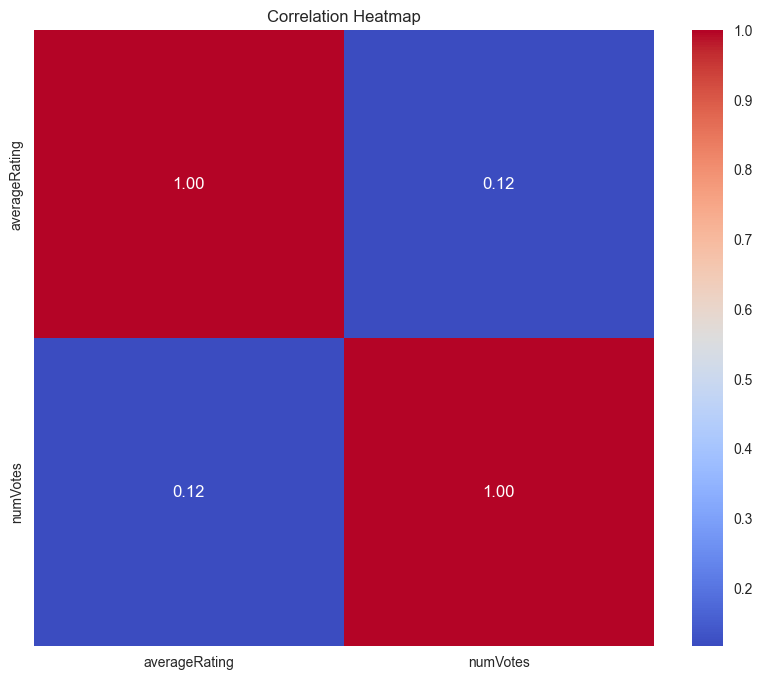

In [78]:
# Display a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Check if the DataFrame has an index name
if df_selected.index.name is not None:
    plt.title(f"Correlation Heatmap - {df_selected.index.name.upper()}")
else:
    plt.title("Correlation Heatmap")

plt.show()


Name_basics Analysis showing the distribution of birth years

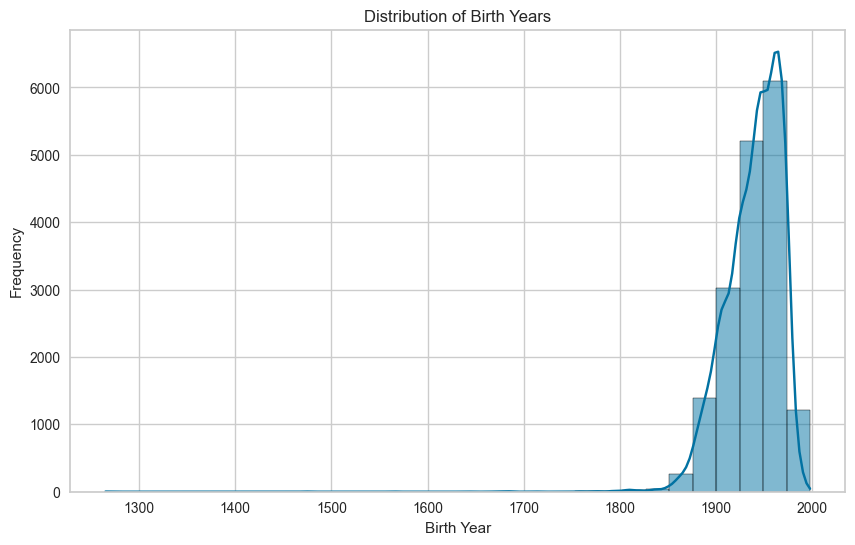

In [80]:
import numpy as np

# Replace 'Unknown' with NaN
name_basics['birthYear'] = name_basics['birthYear'].replace('\\N', np.nan)

# Convert to float
name_basics['birthYear'] = name_basics['birthYear'].astype(float)

# Plot the distribution of Birth Years
plt.figure(figsize=(10, 6))
sns.histplot(name_basics['birthYear'].dropna(), bins=30, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()


Top Professions

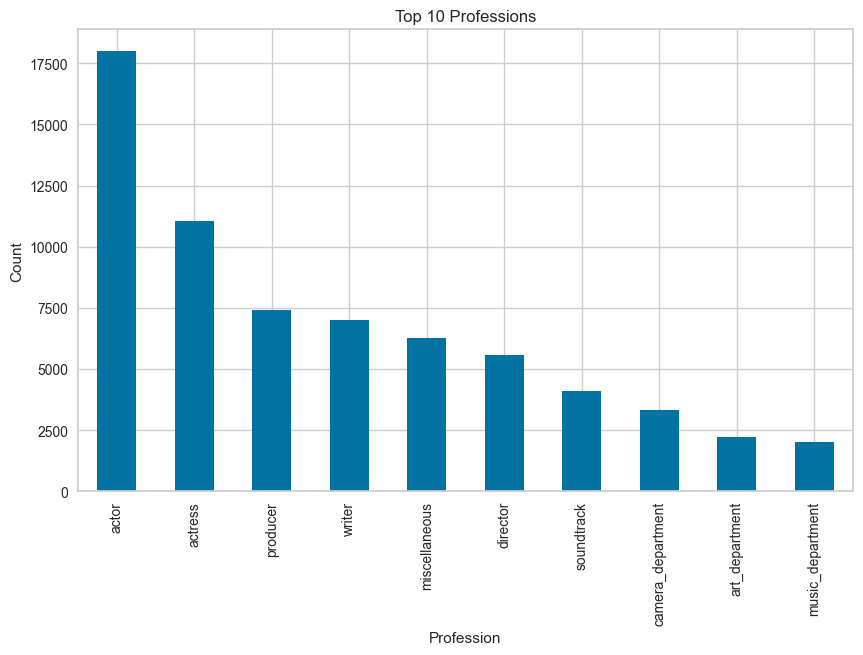

In [81]:
top_professions = name_basics['primaryProfession'].str.split(',', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10, 6))
top_professions.plot(kind='bar')
plt.title('Top 10 Professions')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()


Age Distribution

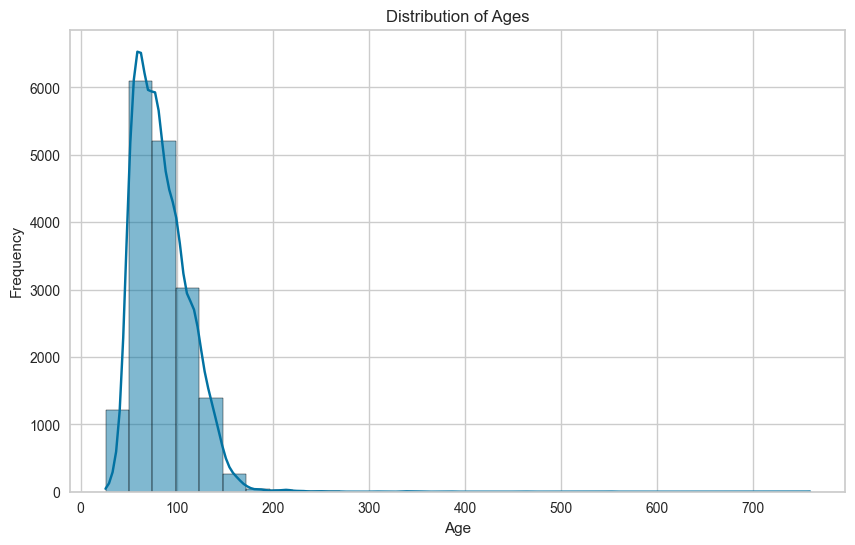

In [83]:
import datetime as dt
import numpy as np

# Replace 'Unknown' with NaN
name_basics['birthYear'] = name_basics['birthYear'].replace('\\N', np.nan)

# Convert to float
name_basics['birthYear'] = name_basics['birthYear'].astype(float)

# Calculate age considering current year
current_year = dt.datetime.now().year
name_basics['age'] = current_year - name_basics['birthYear'].astype(float)

# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(name_basics['age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Title_Akas Analysis

Count of Original Titles

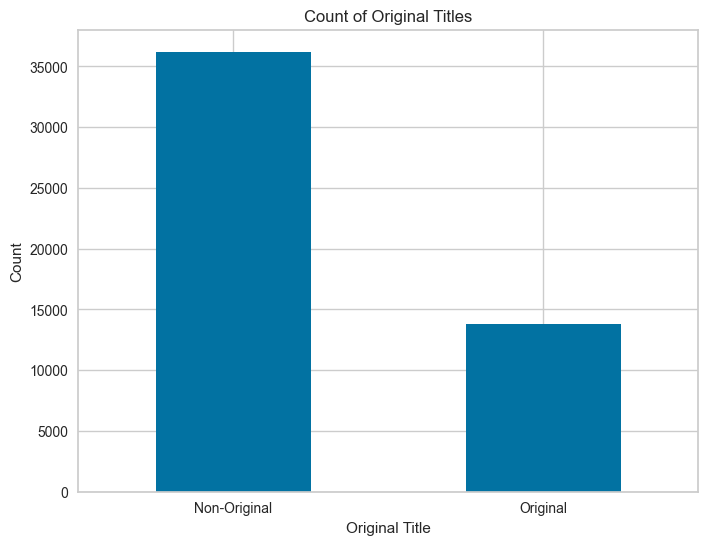

In [84]:
plt.figure(figsize=(8, 6))
title_akas['isOriginalTitle'].value_counts().plot(kind='bar')
plt.title('Count of Original Titles')
plt.xlabel('Original Title')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Original', 'Original'], rotation=0)
plt.show()


Top Regions

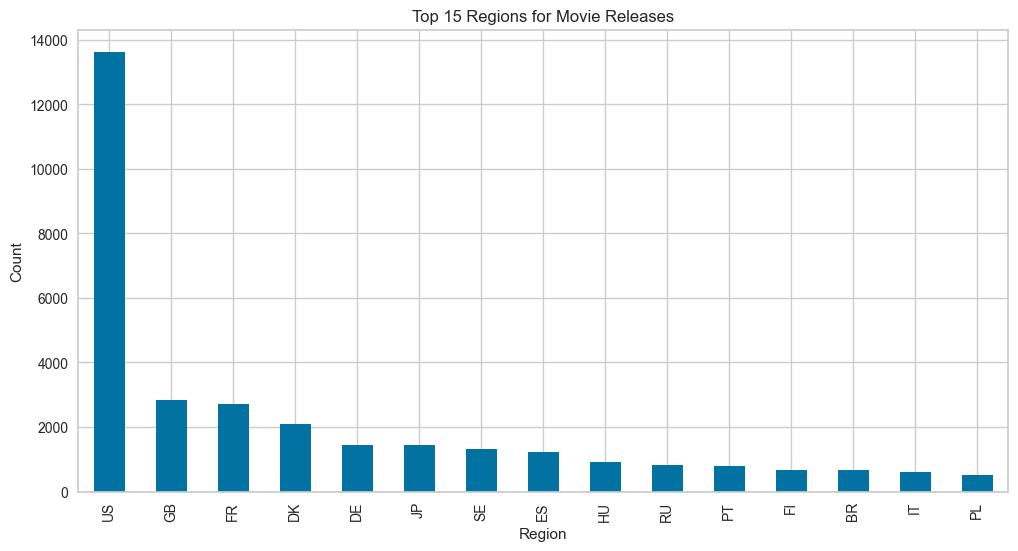

In [85]:
plt.figure(figsize=(12, 6))
top_regions = title_akas['region'].value_counts().head(15)
top_regions.plot(kind='bar')
plt.title('Top 15 Regions for Movie Releases')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


List of actors and the Characters they played

In [87]:
pip install pandasql


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26798 sha256=7d900cc5778cb69d2f48c7849a6890e32aa074a9be6c147adfade295d542fcc3
  Stored in directory: c:\users\keevi\appdata\local\pip\cache\wheels\68\5d\a5\edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import pandas as pd

# Define the URLs for the datasets
name_basics_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/name.basics_New.csv'
title_akas



,titleId,ordering,title,region,types,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,imdbDisplay,0
1,tt0000001,2,Carmencita,DE,NaN,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,imdbDisplay,0
3,tt0000001,4,Καρμενσίτα,GR,imdbDisplay,0
4,tt0000001,5,Карменсита,RU,imdbDisplay,0
...,...,...,...,...,...,...
49995,tt0014060,6,フランス人形,JP,imdbDisplay,0
49996,tt0014060,7,Den franske Dukke,NO,imdbDisplay,0
49997,tt0014060,8,Den franske Dukke,DK,imdbDisplay,0
49998,tt0014060,9,The French Doll,US,imdbDisplay,0


In [91]:
pip install pandas sqlalchemy pandasql


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Create a pipeline with SQL

In [25]:
from sqlalchemy import MetaData

# Create an SQLite database engine
engine = create_engine('sqlite:///:memory:')

# Read CSV files into the SQLite database using a loop
for table_name, url in csv_data.items():
    pd.read_csv(url).to_sql(table_name, engine, index=False, if_exists='fail')

# Reflect database tables
metadata = MetaData()
metadata.reflect(engine)

# Print column names for each table
for table_name, table in metadata.tables.items():
    print(f"Columns for {table_name}: {', '.join(table.columns.keys())}")

Columns for name_basics: nconst, primaryName, birthYear, deathYear, primaryProfession, knownForTitles
Columns for title_akas: titleId, ordering, title, region, types, isOriginalTitle
Columns for title_basics: tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, runtimeMinutes, genres
Columns for title_crew: tconst, directors, writers
Columns for title_episode: tconst, parentTconst, seasonNumber, episodeNumber
Columns for title_ratings: tconst, averageRating, numVotes


In [32]:
# Print column names for each table
for table_name in csv_data.keys():
    table_columns = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 0;", engine).keys()
    print(f"Columns for {table_name}: {', '.join(table_columns)}")

Columns for name_basics: nconst, primaryName, birthYear, deathYear, primaryProfession, knownForTitles
Columns for title_akas: titleId, ordering, title, region, types, isOriginalTitle
Columns for title_basics: tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, runtimeMinutes, genres
Columns for title_crew: tconst, directors, writers
Columns for title_ratings: tconst, averageRating, numVotes
Columns for title_episode: tconst, parentTconst, seasonNumber, episodeNumber


In [36]:
import pandas as pd
from sqlalchemy import create_engine

# Define the CSV URLs and table names in a dictionary
csv_data = {
    'name_basics': 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/name.basics_New.csv',
    'title_akas': 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.akas_New.csv',
    'title_basics': 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.basics_New.csv',
    'title_crew': 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.crew_New.csv',
    'title_ratings': 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.ratings_New.csv',
    'title_episode': 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.episode_New.csv',
}

# Create an SQLite database engine
engine = create_engine('sqlite:///:memory:')

# Read CSV files into the SQLite database using a loop
for table_name, url in csv_data.items():
    pd.read_csv(url).to_sql(table_name, engine, index=False, if_exists='fail')

# Define the SQL query
query = """
SELECT
    ta.titleId, ta.ordering, ta.title, ta.region, ta.types, ta.isOriginalTitle,
    nb.nconst, nb.primaryName, nb.birthYear, nb.deathYear, nb.primaryProfession, nb.knownForTitles,
    tb.tconst, tb.titleType, tb.primaryTitle, tb.originalTitle, tb.isAdult, tb.startYear, tb.endYear, tb.runtimeMinutes, tb.genres,
    tc.directors, tc.writers,
    tr.averageRating, tr.numVotes,
    te.parentTconst, te.seasonNumber, te.episodeNumber
FROM title_akas ta
JOIN title_basics tb ON ta.titleId = tb.tconst
JOIN title_crew tc ON tb.tconst = tc.tconst
JOIN title_ratings tr ON tb.tconst = tr.tconst
LEFT JOIN title_episode te ON tb.tconst = te.tconst
LEFT JOIN name_basics nb ON tc.directors = nb.nconst OR tc.writers = nb.nconst
"""

# Execute the query and display the result
result = pd.read_sql_query(query, engine)
print(result)




         titleId  ordering                               title region  \
0      tt0000001         1                          Карменсіта     UA   
1      tt0000001         2                          Carmencita     DE   
2      tt0000001         3           Carmencita - spanyol tánc     HU   
3      tt0000001         4                          Καρμενσίτα     GR   
4      tt0000001         5                          Карменсита     RU   
...          ...       ...                                 ...    ...   
21686  tt0014051         5                             The Fog     US   
21687  tt0014057         1                  The Fortune Teller   None   
21688  tt0014057         2                  The Fortune Teller     US   
21689  tt0014057         3  Out of the Inkwell: Fortune Teller     US   
21690  tt0014057         4                      Fortune Teller     US   

             types  isOriginalTitle     nconst           primaryName  \
0      imdbDisplay                0  nm0005690  Wil

In [2]:
pip install requests

  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/57/ec/80c8d48ac8b1741d5b963797b7c0c869335619e13d4744ca2f67fc11c6fc/charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/c2/e7/a82b05cf63a603df6e68d59ae6a68bf5064484a0718ea5033660af4b54a9/idna-3.6-py3-none-any.whl.metadata
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Obtaining dependency information for certifi>=2017.4.17 from https://files.pythonhosted.org/packages/ba/06/a07f096c664aeb9f01624f858c3add0a4e913d6c96257a

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import sqlite3
from io import BytesIO
import requests

# Define the raw URLs for the CSV files on GitHub
name_basics_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/name.basics_New.csv'
title_akas_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.akas_New.csv'
title_basics_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.basics_New.csv'
title_crew_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.crew_New.csv'
title_ratings_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.ratings_New.csv'
title_episode_url = 'https://github.com/amyou518/ADS-507-Project/raw/main/data_preprocessing/title.episode_New.csv'

# Load CSV data into DataFrames
name_basics_df = pd.read_csv(name_basics_url)
title_akas_df = pd.read_csv(title_akas_url)
title_basics_df = pd.read_csv(title_basics_url)
title_crew_df = pd.read_csv(title_crew_url)
title_ratings_df = pd.read_csv(title_ratings_url)
title_episode_df = pd.read_csv(title_episode_url)

# SQLite Database Connection
db_path = 'C:/Users/keevi/OneDrive/Documents/SDU/ADS-507/Team6movies.db'

conn = sqlite3.connect(db_path)

# Write DataFrames to SQL Tables
name_basics_df.to_sql('name_basics_new', conn, index=False)
title_akas_df.to_sql('title_akas', conn, index=False)
title_basics_df.to_sql('title_basics', conn, index=False)
title_crew_df.to_sql('title_crew', conn, index=False)
title_ratings_df.to_sql('title_ratings', conn, index=False)
title_episode_df.to_sql('title_episode', conn, index=False)

# Close the database connection
conn.close()